In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df= pd.read_csv('/content/drive/MyDrive/encryptix/Bank churn/Churn_Modelling.csv')

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

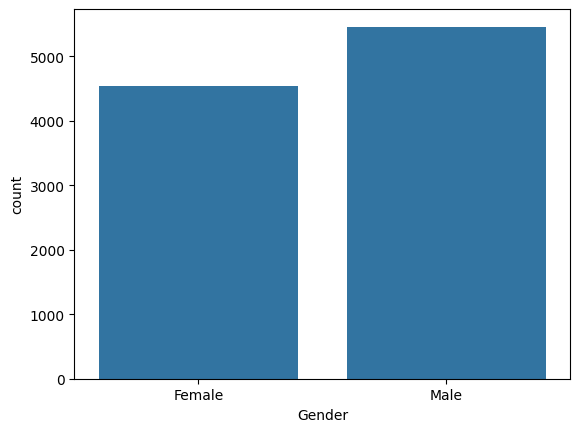

In [6]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Geography', ylabel='count'>

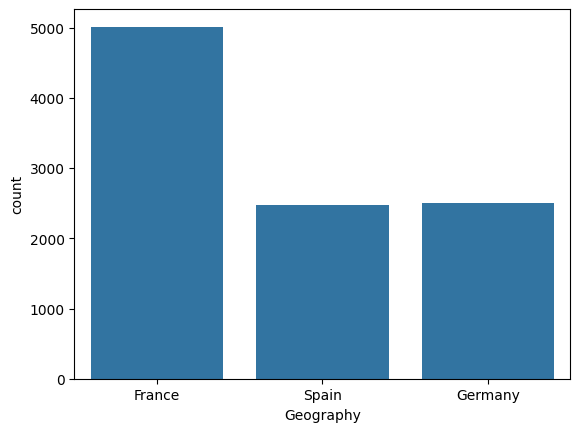

In [4]:
sns.countplot(x='Geography', data=df)

<Axes: xlabel='Exited', ylabel='count'>

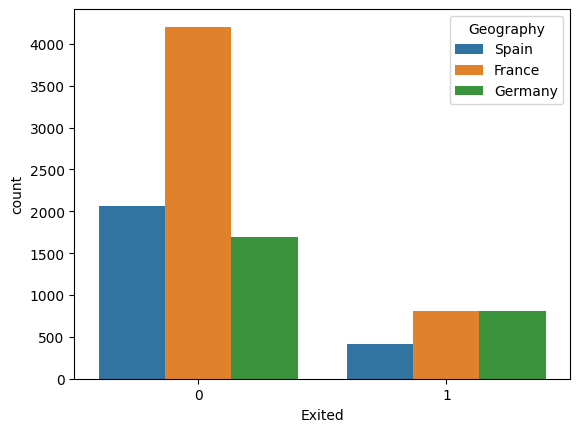

In [7]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
label_encoder = LabelEncoder()
df['Geography']=label_encoder.fit_transform(df["Geography"])
df['Gender']=label_encoder.fit_transform(df["Gender"])

In [17]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [18]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [19]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=42 )

In [20]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

In [21]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'GradientBoostingClassifier']
accuracies=[]

In [26]:
def evaluate(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    accuracies.append(accuracy)

    print("Model Evaluation")
    print(model)
    print()
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    print()
    print('Classification Report:\n',classification_report(y_test,y_pred))

Model Evaluation
LogisticRegression()

Confusion Matrix:
 [[1573   34]
 [ 365   28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



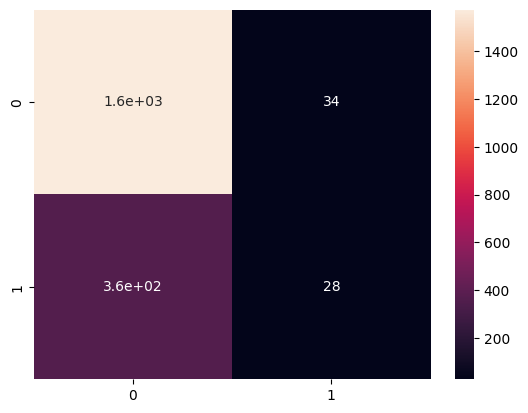

In [27]:
evaluate(model1)

Model Evaluation
RandomForestClassifier()

Confusion Matrix:
 [[1549   58]
 [ 208  185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



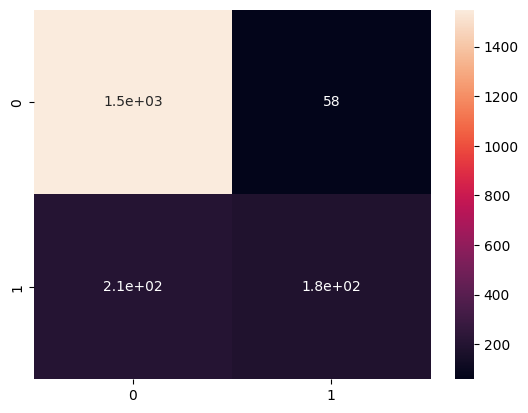

In [28]:
evaluate(model2)

Model Evaluation
GradientBoostingClassifier()

Confusion Matrix:
 [[1547   60]
 [ 209  184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



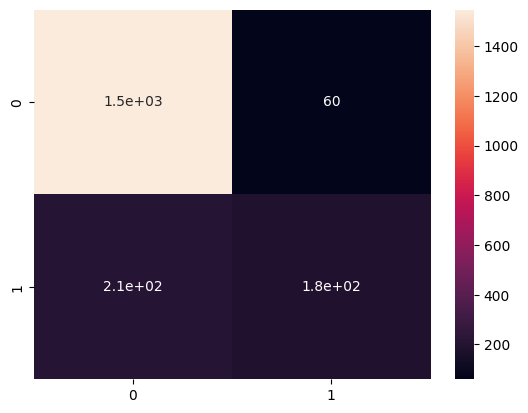

In [29]:
evaluate(model3)